<a href="https://colab.research.google.com/github/orifortigaliyev/data_cleaning/blob/main/model_Tashkent_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [71]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [72]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [73]:
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [74]:
df.describe()

,rooms,size,level,max_levels,price
count,7565.000000,7564.000000,7565.000000,7565.000000,7.466000e+03
mean,2.625644,113.268990,3.699273,6.038202,7.133421e+04
std,1.085201,1491.312092,2.237275,2.613271,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [76]:
q_low = df['size'].quantile(0.01)  # 1% foiz qiymat
q_high = df['size'].quantile(0.99)  # 99% foiz qiymat

df = df[(df['size'] >= q_low) & (df['size'] <= q_high)]


In [79]:
q_low = df['price'].quantile(0.01)  # 1% foiz qiymat
q_high = df['price'].quantile(0.99)  # 99% foiz qiymat

df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

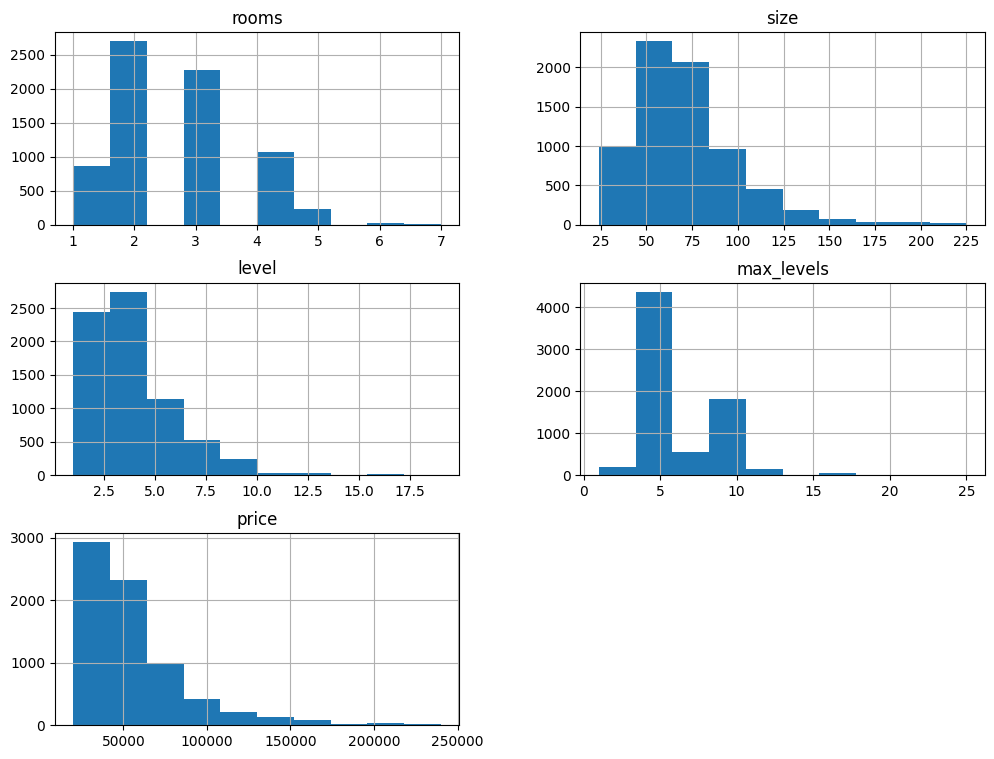

In [80]:
df.hist(figsize=(12,9))
plt.show()

In [81]:
df = pd.get_dummies(df, columns=['district'])

In [83]:
df.drop(columns=['location'], inplace=True)

In [86]:
df.isna().sum()

,0
rooms,0
size,0
level,0
max_levels,0
price,0
district_Бектемирский,0
district_Мирабадский,0
district_Мирзо-Улугбекский,0
district_Олмазорский,0
district_Сергелийский,0


In [96]:
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
scaled_df = pd.DataFrame(standart_scaler.fit_transform(df), columns=df.columns)

In [97]:
scaled_df

,rooms,size,level,max_levels,price,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский
0,0.384753,-0.494837,0.136772,-0.777474,-0.117566,-0.031265,-0.334417,-0.471123,-0.193616,-0.145199,-0.369723,-0.537134,-0.229281,2.737315,-0.309337,-0.044237,-0.250111
1,-0.601624,-0.668308,0.136772,-0.392815,0.008434,-0.031265,-0.334417,-0.471123,-0.193616,-0.145199,-0.369723,-0.537134,-0.229281,-0.365322,3.232720,-0.044237,-0.250111
2,-0.601624,-1.015250,0.136772,-0.777474,-0.590067,-0.031265,-0.334417,-0.471123,-0.193616,-0.145199,-0.369723,1.861731,-0.229281,-0.365322,-0.309337,-0.044237,-0.250111
3,0.384753,-0.217284,-1.209903,-0.777474,-0.196316,-0.031265,-0.334417,-0.471123,-0.193616,-0.145199,-0.369723,1.861731,-0.229281,-0.365322,-0.309337,-0.044237,-0.250111
4,0.384753,-0.043813,-0.312120,-0.392815,-0.023066,-0.031265,-0.334417,-0.471123,-0.193616,-0.145199,-0.369723,1.861731,-0.229281,-0.365322,-0.309337,-0.044237,-0.250111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7163,-1.588000,-1.518316,-0.761011,-0.777474,-1.031067,-0.031265,-0.334417,-0.471123,-0.193616,-0.145199,-0.369723,-0.537134,4.361461,-0.365322,-0.309337,-0.044237,-0.250111
7164,-1.588000,-1.154027,0.585663,-0.392815,-0.983817,-0.031265,-0.334417,-0.471123,-0.193616,-0.145199,-0.369723,-0.537134,-0.229281,-0.365322,-0.309337,-0.044237,3.998222
7165,-0.601624,-0.772391,-1.209903,-0.777474,-0.747567,-0.031265,-0.334417,-0.471123,-0.193616,-0.145199,-0.369723,-0.537134,-0.229281,-0.365322,-0.309337,-0.044237,3.998222
7166,-0.601624,-0.251978,-0.312120,1.145819,-0.495567,-0.031265,-0.334417,-0.471123,-0.193616,-0.145199,-0.369723,-0.537134,4.361461,-0.365322,-0.309337,-0.044237,-0.250111


In [99]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop(columns=['price'])
y = scaled_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear regression

In [100]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.38713574186631533
MSE: 0.3588144980222071
R2 Score: 0.6605271109442863


Random forest

In [105]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE (RandomForest):", mean_absolute_error(y_test, y_pred_rf))
print("MSE (RandomForest):", mean_squared_error(y_test, y_pred_rf))
print("R2 Score (RandomForest):", r2_score(y_test, y_pred_rf))

MAE (RandomForest): 0.30070459779655206
MSE (RandomForest): 0.26002887237724925
R2 Score (RandomForest): 0.7539877763290906


In [108]:
import pickle

with open('model-Tashkent_housing.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

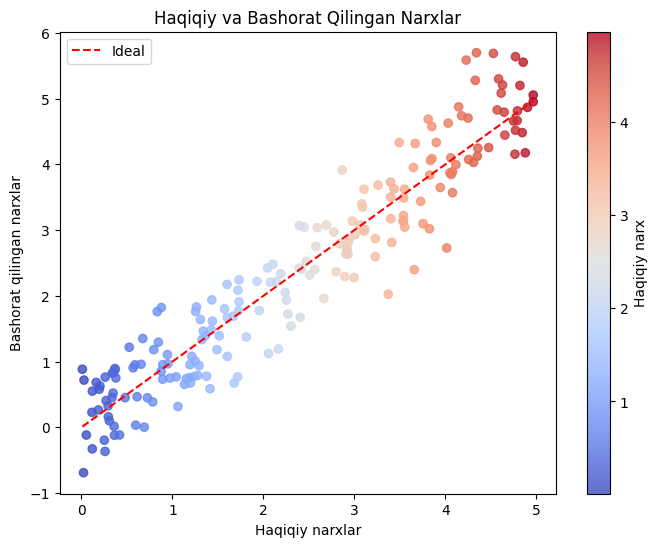

In [128]:

y_test = np.random.rand(200) * 5
y_pred = y_test + np.random.randn(200) * 0.5

colors = y_test

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c=colors, cmap="coolwarm", alpha=0.8)
plt.colorbar(label="Haqiqiy narx")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal")
plt.xlabel("Haqiqiy narxlar")
plt.ylabel("Bashorat qilingan narxlar")
plt.title("Haqiqiy va Bashorat Qilingan Narxlar")
plt.legend()
plt.show()